# Michrograd
## An autograd --> Automatic gradient engine
### It implements the backpropogation algorithm to efficiently evaluate the gradient of a loss function with respect to the weights of a neural network.
### By this we can iteratively tune the weights of a neural network to minimize the loss function. That improves the accuracy of a network.


### --------------------------------------------------------------------------------------
# Backpropogation recursively applies the chain rule from the calculus that allows us to know the derivatives of 'g' with respect to all the internal nodes like- e,d,c as well as inputs - a,b.
## derivative --> dg/da, dg/db etc." It shows how a and b are affecting g through this mathematical expression. "
# let dg/da = 138.8338
## means, if we slightly increase a and make it larger then 138 is telling us that g will grow and the slop of that growth is going to be 138.
### ***Tells us that how g will respond if a tweeked into a little in positive direction.

## Neural networks are mathematical expression the take:
### input data + weights of neural network ----> undergo a mathematical expression -----> Provides Output (Prediction)

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def f(x):
    return 3*x**2 - 4*x + 5

In [3]:
f(3.0)

20.0

In [4]:
xs = np.arange(-5, 5, 0.25)
xs

array([-5.  , -4.75, -4.5 , -4.25, -4.  , -3.75, -3.5 , -3.25, -3.  ,
       -2.75, -2.5 , -2.25, -2.  , -1.75, -1.5 , -1.25, -1.  , -0.75,
       -0.5 , -0.25,  0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,
        1.75,  2.  ,  2.25,  2.5 ,  2.75,  3.  ,  3.25,  3.5 ,  3.75,
        4.  ,  4.25,  4.5 ,  4.75])

In [5]:
ys = f(xs)
ys

array([100.    ,  91.6875,  83.75  ,  76.1875,  69.    ,  62.1875,
        55.75  ,  49.6875,  44.    ,  38.6875,  33.75  ,  29.1875,
        25.    ,  21.1875,  17.75  ,  14.6875,  12.    ,   9.6875,
         7.75  ,   6.1875,   5.    ,   4.1875,   3.75  ,   3.6875,
         4.    ,   4.6875,   5.75  ,   7.1875,   9.    ,  11.1875,
        13.75  ,  16.6875,  20.    ,  23.6875,  27.75  ,  32.1875,
        37.    ,  42.1875,  47.75  ,  53.6875])

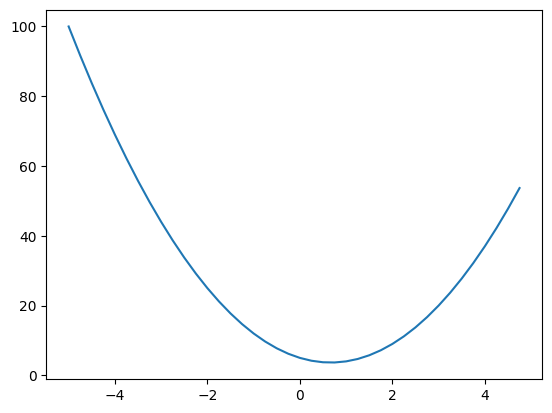

In [6]:
plt.plot(xs,ys)

## Derivative basically defines the response of a small change in a value indicated as its slop of change.

In [7]:
# demonstration of derivative importance
x = 3.0
f(x)

20.0

In [8]:
h = 0.00000001
f(x + h)

20.00000014

In [9]:
# calculation of slop (Numerical approximation of a slop)
(f(x + h)-f(x))/h

14.00000009255109

In [10]:
x = -3
h = 0.00000001
(f(x+h) - f(x))/h

-22.00000039920269

In [11]:
x=2/3 # this value holds no change means slop will be almost or equal to 0
f(x)

3.666666666666667

In [12]:
h=0.000001
f(x+h)

3.6666666666696663

In [13]:
(f(x + h)-f(x))/h

2.999378523327323e-06

## --------------------------------------------------------------------------
### a bit complex

In [14]:
a = 2.0
b = -3.0
c = 10.0
d = a*b+c
print(d)

4.0


In [15]:
# we want to know the derivative of with respect to a,b,c.
h = 0.0001

a = 2.0
b = -3.0
c = 10.0

d1= a*b+c
a+=h
d2 = a*b+c
print('d1',d1)
print('d2',d2)
print("slope",(d2-d1)/h)


d1 4.0
d2 3.999699999999999
slope -3.000000000010772


In [16]:
# we want to know the derivative of with respect to a,b,c.
h = 0.0001

a = 2.0
b = -3.0
c = 10.0

d1= a*b+c
b+=h
d2 = a*b+c
print('d1',d1)
print('d2',d2)
print("slope",(d2-d1)/h)


d1 4.0
d2 4.0002
slope 2.0000000000042206


In [17]:
# we want to know the derivative of with respect to a,b,c.
h = 0.0001

a = 2.0
b = -3.0
c = 10.0

d1= a*b+c
c+=h
d2 = a*b+c
print('d1',d1)
print('d2',d2)
print("slope",(d2-d1)/h)


d1 4.0
d2 4.0001
slope 0.9999999999976694


# -----------------------------------------------------------
## Bulding data structues for neural networks.

In [18]:
class Value:
    # __init__ is a constructor method takes a single argument data and initialize an instance variable also called data with the provided argument.
    # self is a reference to the instance of the value class that is being created. it is the convension in python to use self as the first paremeter in the instance declaractions in order to have access to the instance's attributes and methods.
    def __init__(self,data, _children = (), _op = (), label = ''):
        self.data = data
        self.grad = 0.0
        self._backward = lambda: 0
        self._prev = set(_children)
        self._op = _op
        self.label = label
    # __repr__ is a special method which returns a string representation of the object.
    # here, it returns a formatted string that includes the value of the data instance variable.
    def __repr__(self):
        return f"Value(data={self.data})"

    def __add__(self,other):
        other = other if isinstance(other,Value) else Value(other)
        out = Value(self.data + other.data, (self,other), "+")

        def _backward():
            self.grad += 1.0 * out.grad
            other.grad += 1.0 * out.grad
        out._backward = _backward
        return out

    def __mul__(self,other):
        other = other if isinstance(other,Value) else Value(other)
        out = Value(self.data * other.data, (self,other), "*")
        def _backward():
            self.grad += other.data * out.grad
            other.grad += self.data * out.grad
        out._backward = _backward
        return out

    def __pow__(self,other):
        assert isinstance(other, (int, float)),"only supporting int/float powers now"
        out = Value(self.data**other, (self,), f'**{other}')

        def _backward():
            self.grad += other * self.data ** (other - 1) * out.grad
        out._backward = _backward

        return out

    def __rmul__(self, other): # other * self
        return self * other

    def __truediv__(self,other): # self/other
        return self * other**-1

    def __neg__(self): # - self
        return self * -1

    def __sub__(self, other): # other - self
        return self + (-other)

    def __radd__(self, other):  # other + self
        return self + other

    def relu(self):
        out = Value(0 if self.data < 0 else self.data, (self,), 'ReLU')

        def _backward():
            self.grad += (out.data > 0) * out.grad
        out._backward = _backward

        return out

    def tanh(self):
        x = self.data
        t = (math.exp(2*x)-1)/(math.exp(2*x)+1)
        out = Value(t, (self, ), 'tanh')

        def _backward():
            self.grad += (1 - t**2) * out.grad
        out._backward = _backward
        return out

    def exp(self):
        x = self.data
        out = Value(math.exp(x), (self, ), 'exp')

        def _backward():
            self.grad += out.data * out.grad
        out._backward = _backward
        return out

    def backward(self):
        topo = []
        visited = set()
        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)
        build_topo(self)

        self.grad = 1.0
        for node in reversed(topo):
            node._backward()

In [19]:
a = Value(2.0, label = 'a')
b = Value(-3.0, label = 'b')
c = Value(10.0, label = 'c')
# (a.__mul__(b)).__add__(c)
d = a*b; d.label = 'd'
e = d + c; e.label = 'e'
e

Value(data=4.0)

In [20]:
#d._prev

In [21]:
#d._op

# Expression visualization

In [22]:
!pip install graphviz 2.38

ERROR: Could not find a version that satisfies the requirement 2.38 (from versions: none)
ERROR: No matching distribution found for 2.38


In [23]:
from graphviz import Digraph

def trace(root):
    # build a set of all nodes and edges in the graph
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child,v))
                build(child)
    build(root)
    return nodes,edges

def draw_dot(root):
    dot = Digraph(format='svg', graph_attr = {'rankdir': 'LR'}) # LR --> Left to Right

    nodes, edges = trace(root)
    for n in nodes:
        uid = str(id(n))
        # for any value in the graph, create a rectangular ("record") node for it
        dot.node(name = uid, label = "{ %s | data %.4f| grad %.4f }" % (n.label, n.data, n.grad), shape = 'record')
        if n._op:
            # if this value is a result of some operation, create an op node for it
            dot.node(name = uid + n._op, label = n._op)
            # and connect this node to it
            dot.edge(uid + n._op, uid)

    for n1, n2 in edges:
        # connect n1 to the op node of n2
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)

    return dot

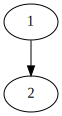

In [24]:
dot = Digraph()
# Add nodes 1 and 2
dot.node('1')
dot.node('2')

# Add edge between 1 and 2
dot.edges(['12'])
# Visualize the graph
dot

In [25]:
a = Value(2.0, label = 'a')
b = Value(-3.0, label = 'b')
c = Value(10.0, label = 'c')
# (a.__mul__(b)).__add__(c)
d = a*b; d.label = 'd'
e = d + c; e.label = 'e'
f = Value(-2.0, label = 'f')
g = e * f; g.label = 'g'
g

Value(data=-8.0)

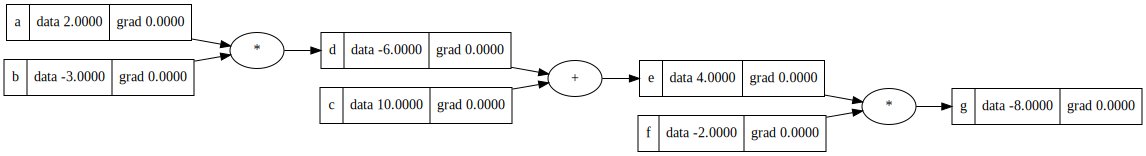

In [26]:
draw_dot(g)

In [27]:
g.grad = 1
f.grad = 4.0
e.grad = -2.0
d.grad = -2.0
c.grad = -2.0
a.grad = 6.0
b.grad  = -4.0

In [28]:
a.data += 0.01 * a.grad
b.data += 0.01 * b.grad
c.data += 0.01 * c.grad
f.data += 0.01 * f.grad

d = a * b
e = d + c
g = e * f

print(g.data)

-7.286496


In [29]:
def lol():

    h = 0.001

    a = Value(2.0, label = 'a')
    b = Value(-3.0, label = 'b')
    c = Value(10.0, label = 'c')
    # (a.__mul__(b)).__add__(c)
    d = a*b; d.label = 'd'
    e = d + c; e.label = 'e'
    f = Value(-2.0, label = 'f')
    g = e * f; g.label = 'g'
    g1 = g.data

    a = Value(2.0, label = 'a')
    b = Value(-3.0, label = 'b')
    c = Value(10.0, label = 'c')
    # (a.__mul__(b)).__add__(c)
    d = a*b; d.label = 'd'
    e = d + c; e.label = 'e'
    f = Value(-2.0, label = 'f')
    g = e * f; g.label = 'g'
    g2 = g.data + h

    print((g2-g1)/h)

lol()

1.000000000000334


# ------------------------------------------------------------
## sample:
## manual back propogation through a neuron

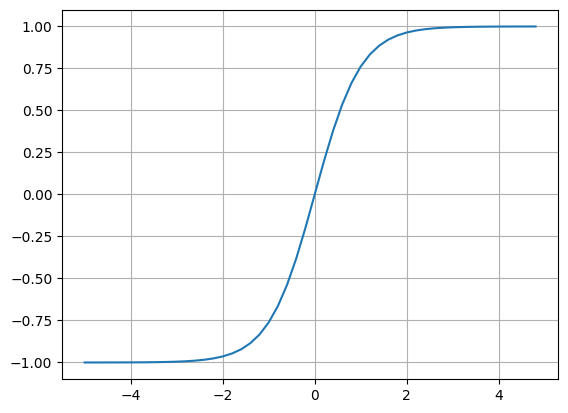

In [30]:
# demo of 'tanh' activation function.
plt.plot(np.arange(-5, 5, 0.20), np.tanh(np.arange(-5, 5, 0.20))); plt.grid();

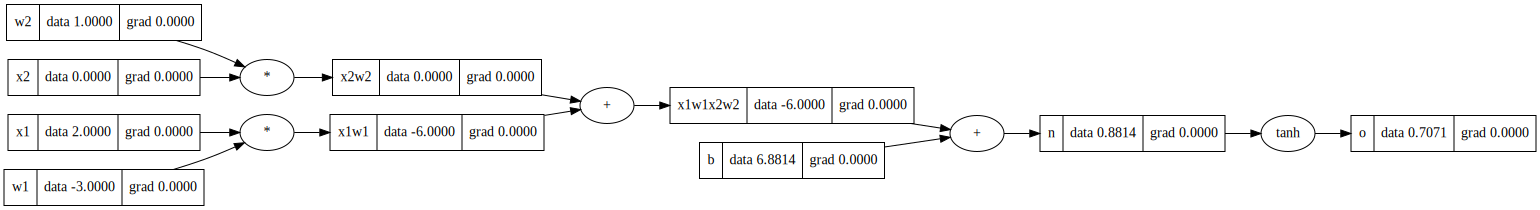

In [31]:
# inputs
x1 = Value(2.0, label = 'x1')
x2 = Value(0.0, label = 'x2')
# weights
w1 = Value(-3.0, label = 'w1')
w2 = Value(1.0, label = 'w2')
# bias of the neuron
b = Value(6.8813735870195432, label = 'b')
# x1w1 + x1w2 + b
x1w1 = x1*w1; x1w1.label = 'x1w1'
x2w2= x2*w2; x2w2.label = 'x2w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1w1x2w2'
n = x1w1x2w2 + b; n.label = 'n'
# activation function --> tanh is a hyperbolic function
o = n.tanh(); o.label = 'o'
draw_dot(o)

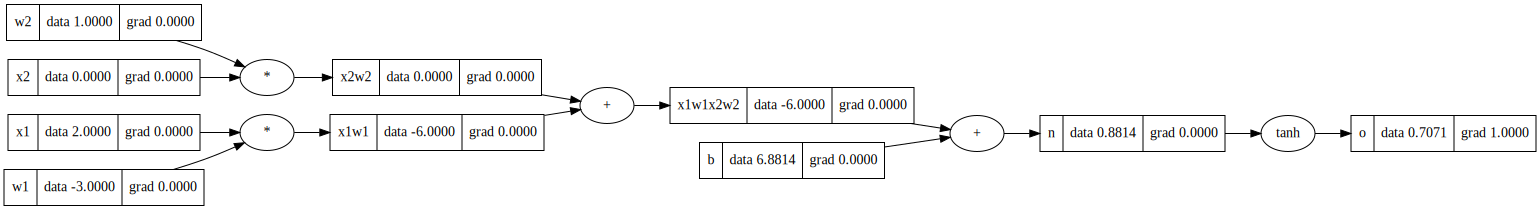

In [32]:
o.grad = 1.0 # do/do
draw_dot(o)

### o can not backpropgate through tanh so we will need a local derivative of tanh.

In [33]:
# o = tanh(n)
# do/dn ??
# d (tanh x)/dx = 1- tanh^2x
# therefore, do/dn = 1 - tanh(n)**2 ---->> 1-o**2
o.data

0.7071067811865476

In [34]:
1 - o.data**2

0.4999999999999999

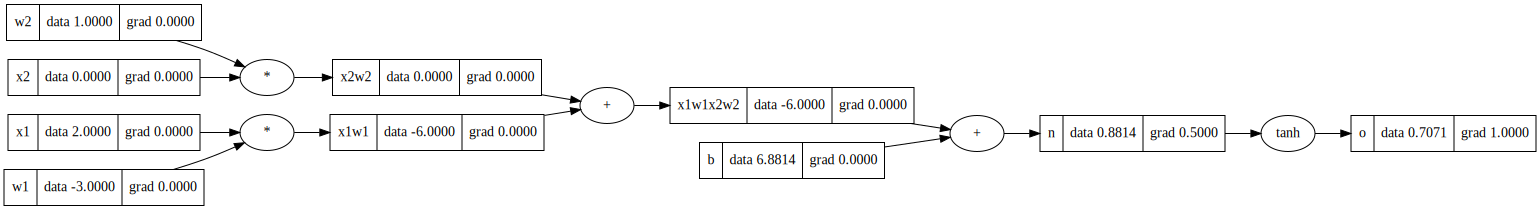

In [35]:
n.grad = 0.5
draw_dot(o)

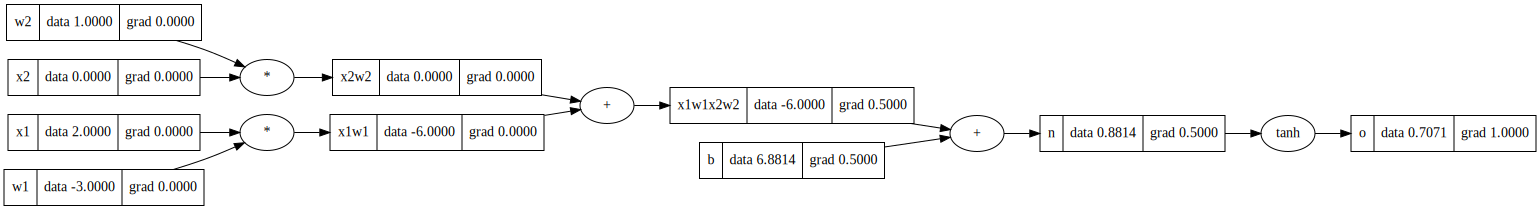

In [36]:
x1w1x2w2.grad = 0.5
b.grad = 0.5
draw_dot(o)

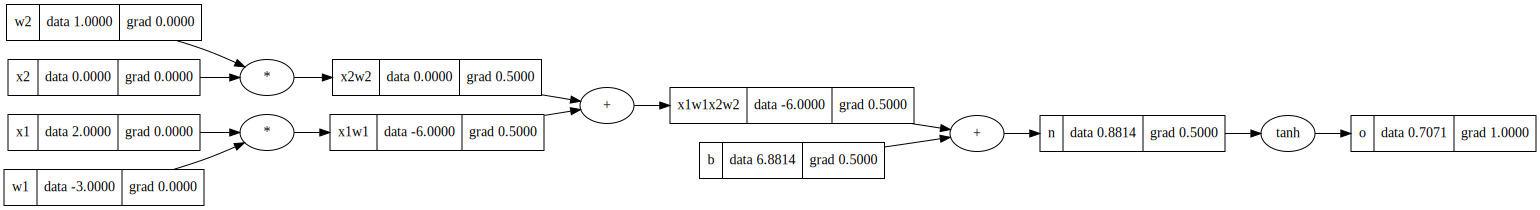

In [37]:
x1w1.grad = 0.5
x2w2.grad = 0.5
draw_dot(o)

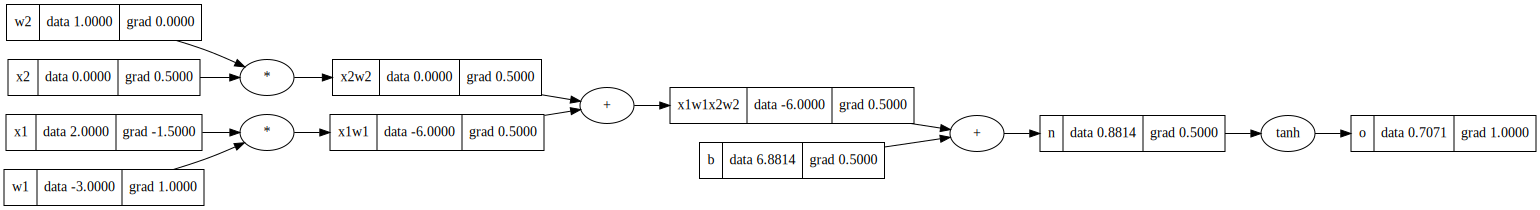

In [38]:
x1.grad = w1.data * x1w1.grad
w1.grad = x1.data * x1w1.grad
x2.grad = w2.data * x2w2.grad
w2.grad = x2.data * x2w2.grad

draw_dot(o)

# -------------------------------------
### applyig the automatic approach by using "_backward"

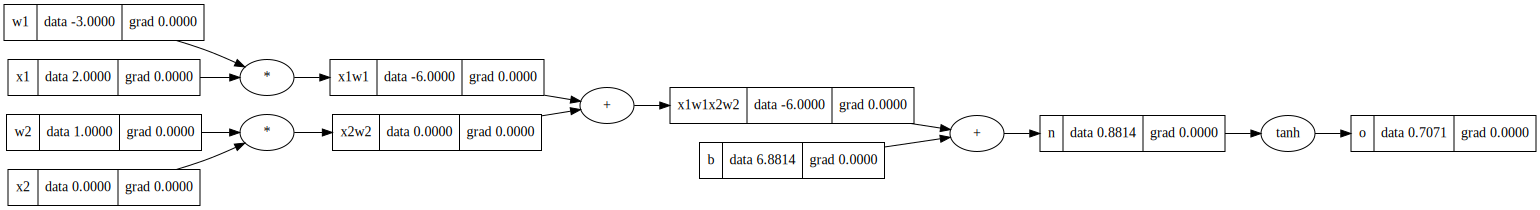

In [39]:
# inputs
x1 = Value(2.0, label = 'x1')
x2 = Value(0.0, label = 'x2')
# weights
w1 = Value(-3.0, label = 'w1')
w2 = Value(1.0, label = 'w2')
# bias of the neuron
b = Value(6.8813735870195432, label = 'b')
# x1w1 + x1w2 + b
x1w1 = x1*w1; x1w1.label = 'x1w1'
x2w2= x2*w2; x2w2.label = 'x2w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1w1x2w2'
n = x1w1x2w2 + b; n.label = 'n'
# activation function --> tanh is a hyperbolic function
o = n.tanh(); o.label = 'o'
draw_dot(o)

In [40]:
o.grad = 1

In [41]:
o._backward()

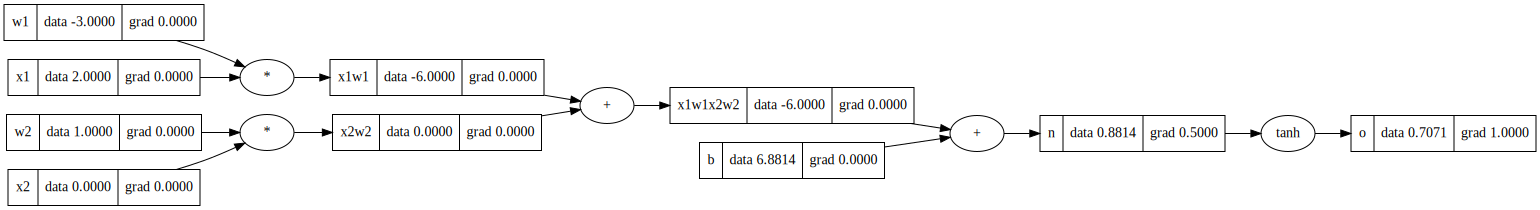

In [42]:
draw_dot(o)

In [43]:
n._backward()

In [44]:
b._backward() # this is a leaf node that's why it will not be propogated.

0

In [45]:
x1w1x2w2._backward()
x1w1._backward()
x2w2._backward()

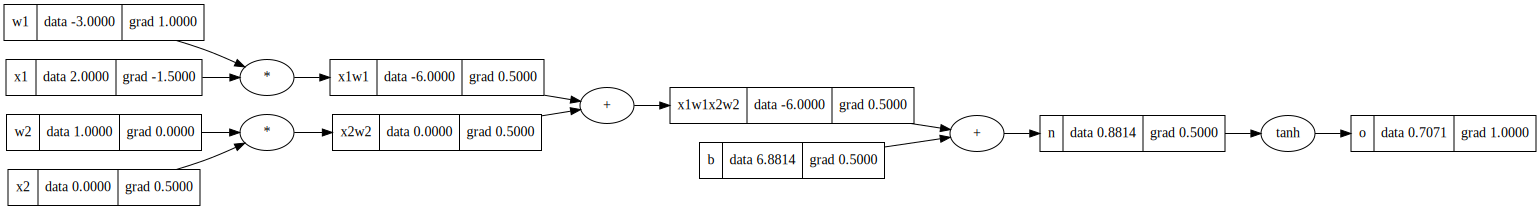

In [46]:
draw_dot(o)

In [47]:
# topological sort
# it is a layout of a graph such that all the edges only go from left to right.
topo = []
visited = set()
def build_topo(v):
    if v not in visited:
        visited.add(v)
        for child in v._prev:
            build_topo(child)
        topo.append(v)
build_topo(o)
topo

[Value(data=6.881373587019543),
 Value(data=2.0),
 Value(data=-3.0),
 Value(data=-6.0),
 Value(data=1.0),
 Value(data=0.0),
 Value(data=0.0),
 Value(data=-6.0),
 Value(data=0.8813735870195432),
 Value(data=0.7071067811865476)]

# ---------------------------------------------------

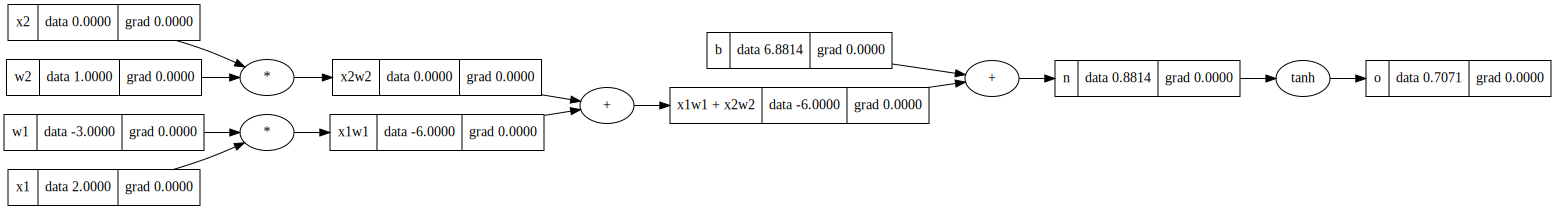

In [48]:
# inputs
x1 = Value(2.0, label = 'x1')
x2 = Value(0.0, label = 'x2')
# weights
w1 = Value(-3.0, label = 'w1')
w2 = Value(1.0, label = 'w2')
# bias of the neuron
b = Value(6.8813735870195432, label = 'b')
# x1w1 + x1w2 + b
x1w1 = x1*w1; x1w1.label = 'x1w1'
x2w2= x2*w2; x2w2.label = 'x2w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1w1 + x2w2'
n = x1w1x2w2 + b; n.label = 'n'
# activation function --> tanh is a hyperbolic function
o = n.tanh(); o.label = 'o'
draw_dot(o)

In [49]:
o.grad = 1.0


# topological sort
# it is a layout of a graph such that all the edges only go from left to right.
topo = []
visited = set()
def build_topo(v):
    if v not in visited:
        visited.add(v)
        for child in v._prev:
            build_topo(child)
        topo.append(v)
build_topo(o)

for node in reversed(topo):
    node._backward()

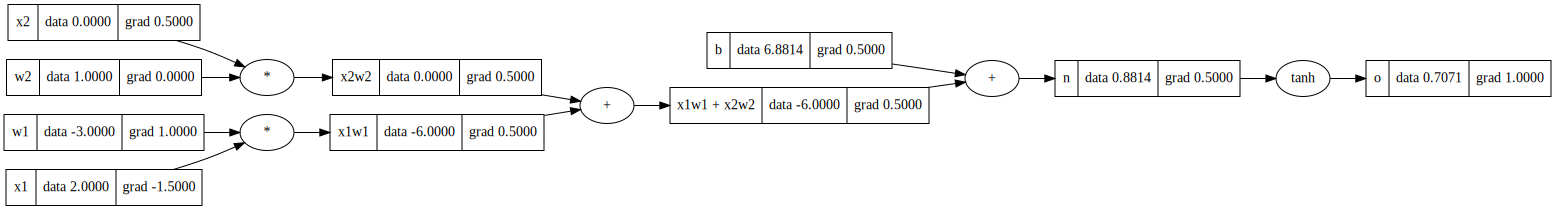

In [50]:
draw_dot(o)

# ----------------------------------------------------

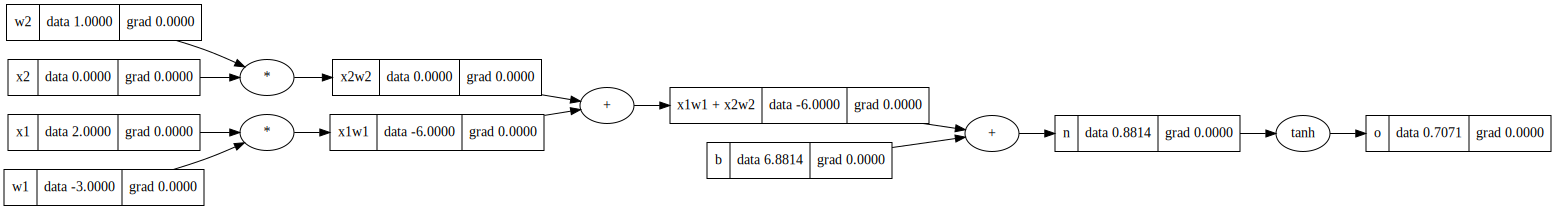

In [51]:
# inputs
x1 = Value(2.0, label = 'x1')
x2 = Value(0.0, label = 'x2')
# weights
w1 = Value(-3.0, label = 'w1')
w2 = Value(1.0, label = 'w2')
# bias of the neuron
b = Value(6.8813735870195432, label = 'b')
# x1w1 + x1w2 + b
x1w1 = x1*w1; x1w1.label = 'x1w1'
x2w2= x2*w2; x2w2.label = 'x2w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1w1 + x2w2'
n = x1w1x2w2 + b; n.label = 'n'
# activation function --> tanh is a hyperbolic function
o = n.tanh(); o.label = 'o'
draw_dot(o)

In [52]:
o.backward()

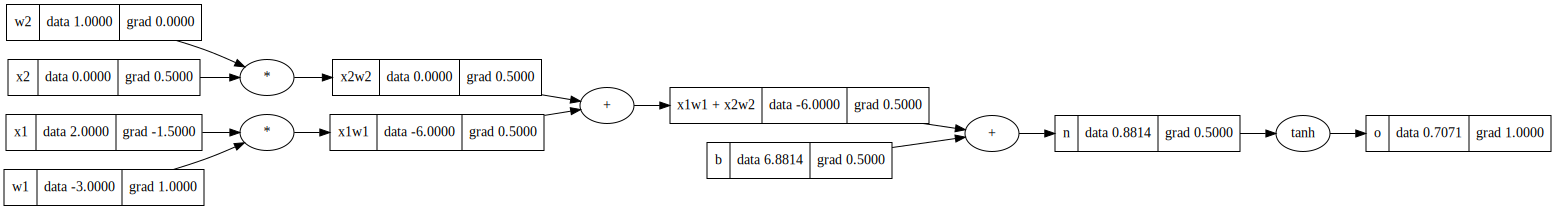

In [53]:
draw_dot(o)

# ------------------------------------------------------------------
# some existing flaws

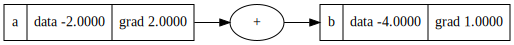

In [54]:
# problem sample - 1
a = Value(-2.0, label = 'a')
b = a+a; b.label = 'b'
b.backward()
draw_dot(b)
# here, a.grad = 1.0 is wrong as a is adding twice its grad should be 2.0.

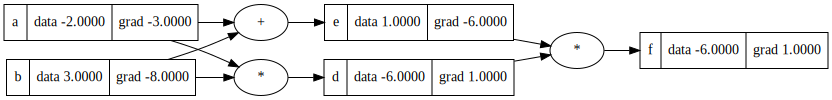

In [55]:
# problem sample 2
a= Value(-2.0, label = 'a')
b= Value(3.0, label = 'b')
d = a * b; d.label = 'd'
e = a + b; e.label = 'e'
f = d * e; f.label = 'f'

f.backward()

draw_dot(f)
# main problem: it is overwritting the previous value of nodes

In [56]:
# solution:
# we need to add these gradients which will provide the correct answer

# -------------------------------------------------------------
## sol.

In [57]:
# use " += " on all the _backward and backward function of class Value.

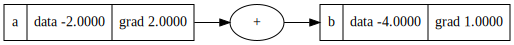

In [58]:
# problem sample - 1
a = Value(-2.0, label = 'a')
b = a+a; b.label = 'b'
b.backward()
draw_dot(b)
# here, a.grad = 1.0 is wrong as a is adding twice its grad should be 2.0.

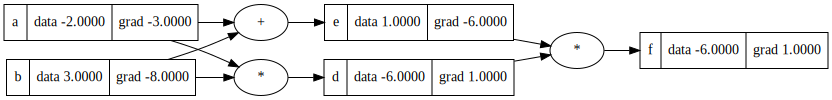

In [59]:
# problem sample 2
a= Value(-2.0, label = 'a')
b= Value(3.0, label = 'b')
d = a * b; d.label = 'd'
e = a + b; e.label = 'e'
f = d * e; f.label = 'f'

f.backward()

draw_dot(f)
# main problem: it is overwritting the previous value of nodes

In [60]:
# prob 3
#a = Value(2.0)
#a + 1
# this can not be done with our existing code so we will include other which means any non-Value number will be converted into a value object.

In [61]:
# now it will work
a = Value(2.0)
a + 1

Value(data=3.0)

In [62]:
b = Value(4.0)
b * 6

Value(data=24.0)

In [63]:
# but
#2 * a
# it will still not work b/c as we know (a * 2) will be persue as (a.__mul__(2)) in python but when we do (2 * a) it will percept like (2.__mul__(a)) which is not possible in python

In [64]:
# so we can introduce a function to work them as well that is, "__rmul__" function
# __rmul__ functioning: as we know python can not interpret 2 * a so __rmul__ will check if a knows to multiply or not so, here it will change  2 * a to a * 2 using __rmul__ function and then follow the usual route with __mul__ function.

In [65]:
a = Value(2.0)
2 * a

Value(data=4.0)

# ----------------------------------------------

In [66]:
# introducing exp -->> exponantial function (to use e^2x - 1/ e^2x + 1 known as hyperblic tangent(used for tanh activation function))

In [67]:
a = Value(2.0)
a.exp()

Value(data=7.38905609893065)

In [68]:
a = Value(2.0)
b = Value(4.0)
a / b
a - b
# showing error:- TypeError: unsupported operand type(s) for /: 'Value' and 'Value'

Value(data=-2.0)

# solution:
## we will introduce a division function with more diverse approach:
### a / b == a* (1/b) == a * (b**-1)

In [69]:
a = Value(2.0)
b = Value(4.0)
a / b

Value(data=0.5)

In [70]:
a = Value(2.0)
b = Value(4.0)
a - b

Value(data=-2.0)

# ----------------------------------------------------------

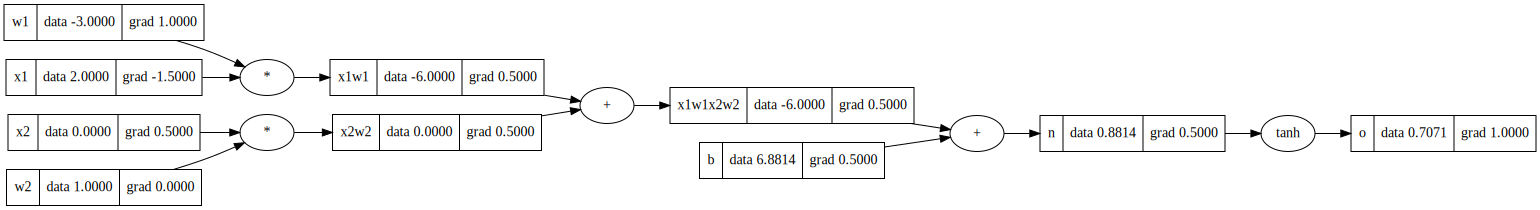

In [71]:
#
# inputs
x1 = Value(2.0, label = 'x1')
x2 = Value(0.0, label = 'x2')
# weights
w1 = Value(-3.0, label = 'w1')
w2 = Value(1.0, label = 'w2')
# bias of the neuron
b = Value(6.8813735870195432, label = 'b')
# x1w1 + x1w2 + b
x1w1 = x1*w1; x1w1.label = 'x1w1'
x2w2= x2*w2; x2w2.label = 'x2w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1w1x2w2'
n = x1w1x2w2 + b; n.label = 'n'
# activation function --> tanh is a hyperbolic function
o = n.tanh(); o.label = 'o'
o.backward()
draw_dot(o)

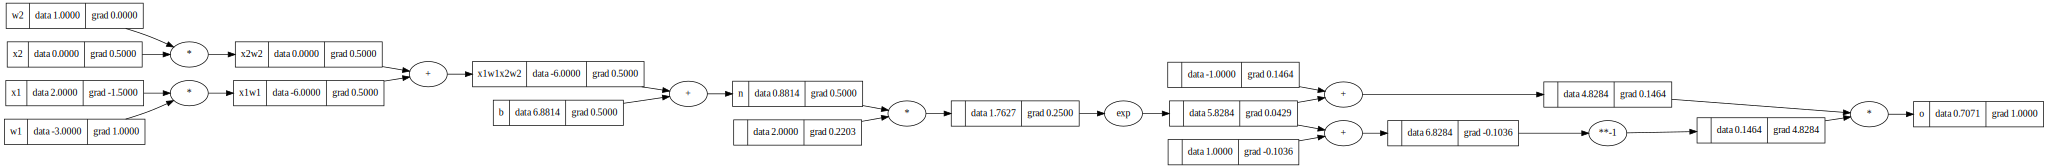

In [72]:
# now we will breakdown the tanh into more simlified or detailed format
# inputs
x1 = Value(2.0, label = 'x1')
x2 = Value(0.0, label = 'x2')
# weights
w1 = Value(-3.0, label = 'w1')
w2 = Value(1.0, label = 'w2')
# bias of the neuron
b = Value(6.8813735870195432, label = 'b')
# x1w1 + x1w2 + b
x1w1 = x1*w1; x1w1.label = 'x1w1'
x2w2= x2*w2; x2w2.label = 'x2w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1w1x2w2'
n = x1w1x2w2 + b; n.label = 'n'
# activation function --> tanh is a hyperbolic function
# -----------------
e = (2*n).exp()
o = (e-1) /(e + 1)
# implementing (e^2x-1)/(e^2x+1)
# ----------------
o.label = 'o'
o.backward()
draw_dot(o)

# what is a tensor?
## Tensor is a n-dimensional array of scalar values objects.

# Pytorch is a modern deep neural network library.

In [73]:
import torch

In [74]:
# !pip install torch torchvision

In [75]:
x1 = torch.Tensor([2.0]).double() ; x1.requires_grad = True
x2 = torch.Tensor([0.0]).double() ; x2.requires_grad = True
w1 = torch.Tensor([-3.0]).double() ; w1.requires_grad = True
w2 = torch.Tensor([1.0]).double() ; w2.requires_grad = True
b = torch.Tensor([6.8813735870195432]).double() ; b.requires_grad = True
n = x1*w1 + x2*w2 + b
o = torch.tanh(n)

print(o.data.item())
o.backward()

print("-----------")
print("x2", x2.grad.item())
print("w2", w2.grad.item())
print("x1", x1.grad.item())
print("w1", w1.grad.item())

0.7071066904050358
-----------
x2 0.5000001283844369
w2 0.0
x1 -1.5000003851533106
w1 1.0000002567688737


In [76]:
#help zip?

In [77]:
import random

In [78]:
class Neuron:
    def __init__(self, nin):  # nin --> number of inputs
        self.w = [Value(random.uniform(-1,1)) for _ in range (nin)]
        self.b = Value(random.uniform(-1,1))

    def __call__(self, x):
        # w * x + b
        # zip --> in python zip take two iterators and it create a new iterator that iterates over the tuples over their corresponding entries.
        #act = sum(wi*xi for wi, xi in zip(self.w, x)) + self.b # activation
        # sum has a optional paremeter which is start here, it is stated as 0.0 by default so the elements of sum will be added on top of 0. so we will start it with self.b
        #hence
        act = sum((wi*xi for wi, xi in zip(self.w, x)), self.b)
        out = act.tanh()
        return out

    def parameters(self):
        return self.w + [self.b]

class Layer:
    def __init__(self, nin, nout):
        self.neurons = [Neuron(nin) for _ in range(nout)]

    def __call__(self, x):
        outs = [n(x) for n in self.neurons]
        #return outs
        return outs[0] if len(outs) == 1 else outs

    def parameters(self):
        return [p for neuron in self.neurons for p in neuron.parameters()]
        #params = []
        #for neuron in self.neurons:
         #   ps = neuron.parameters()
          #  params.extend(ps)
		#return params  # these steps are identical or another format for above return line.


class MLP:
    def __init__(self, nin, nouts):
        sz = [nin] + nouts
        self.layers = [Layer(sz[i], sz[i+1]) for i in range (len(nouts))]

    def __call__(self, x):
        for layer in self.layers:
            x = layer(x)
        return x

    def parameters(self):
        return [p for neuron in self.layers for p in neuron.parameters()]

In [79]:
# n.parameters()

In [80]:
x = [2.0, 3.0]
n = Neuron(2)
n(x)

Value(data=-0.3561456565696112)

In [81]:
n.parameters()

[Value(data=0.06494429942288549),
 Value(data=-0.4190984576243708),
 Value(data=0.754942097349619)]

In [82]:
x = [2.0,3.0]
n = Layer(2,3)
n(x)

[Value(data=-0.9686741905353091),
 Value(data=0.8854909017323657),
 Value(data=0.6044718118481146)]

In [83]:
x = [2.0, 3.0, -1.0]
n = MLP(3, [4, 4, 1])
n(x)

Value(data=0.4808332286313777)

In [84]:
n.parameters()

[Value(data=0.15254237618167288),
 Value(data=-0.6703261863518106),
 Value(data=-0.7694610394238468),
 Value(data=0.7871626666078222),
 Value(data=0.8509995349061943),
 Value(data=-0.9659839505196366),
 Value(data=-0.2517162720750774),
 Value(data=0.1804787381259889),
 Value(data=-0.8304825719223037),
 Value(data=0.47703556076639253),
 Value(data=-0.5966585120623003),
 Value(data=-0.34158208234854226),
 Value(data=0.7745136836559683),
 Value(data=0.9159203381863872),
 Value(data=0.7708786527380274),
 Value(data=0.9446834040398728),
 Value(data=-0.7722076716151491),
 Value(data=-0.2772533802640704),
 Value(data=-0.5364675733046216),
 Value(data=-0.7252210921477742),
 Value(data=-0.923152263001797),
 Value(data=0.08570092534938212),
 Value(data=0.09999780909284683),
 Value(data=-0.08049725112544004),
 Value(data=0.6554776259320287),
 Value(data=-0.7742047509831325),
 Value(data=-0.8528169494232054),
 Value(data=0.8854917643161806),
 Value(data=0.8506162525913294),
 Value(data=0.913447929

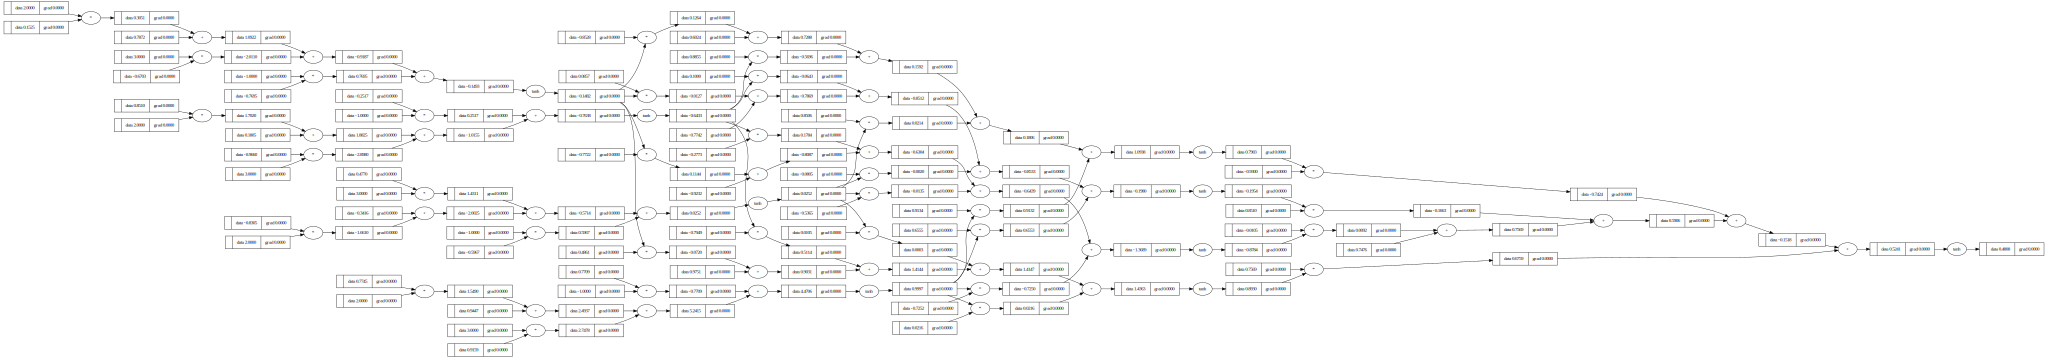

In [85]:
draw_dot(n(x))

# -------------------

In [86]:
# a sample dataset
xs =[
    [2.0, 3.0, -1.0],
    [3.0, -1.0, 0.5],
    [0.5, 1.0, 1.0],
    [1.0, 1.0, -1.0]
]
ys = [1.0, -1.0, -1.0, 1.0] # desired target
ypred = [n(x) for x in xs]
ypred

[Value(data=0.4808332286313777),
 Value(data=0.602146424560907),
 Value(data=0.5269284367144921),
 Value(data=0.5553610464061278)]

In [87]:
# calculating mean square loss
loss = sum((yout - ygt)**2 for ygt, yout in zip(ys, ypred))                          #ygt -->> y_graound_truth and yout -->> y_output
loss

Value(data=5.365621552127033)

In [88]:
ypred = [n(x) for x in xs]
loss = sum((yout - ygt)**2 for ygt, yout in zip(ys, ypred))                          #ygt -->> y_graound_truth and yout -->> y_output
loss

Value(data=5.365621552127033)

In [89]:
loss.backward()

In [90]:
n.layers[0].neurons[1].w[0].grad

0.15469347216191437

In [91]:
n.layers[0].neurons[1].w[0].data

0.8509995349061943

In [92]:
for p in n.parameters():
    p.data += -0.01 * p.grad

In [93]:
n.layers[0].neurons[1].w[0].data

0.8494526001845751

In [94]:
f = draw_dot(loss)

In [95]:
print(f)

digraph {
	graph [rankdir=LR]
	134587577958464 [label="{  | data -0.5453| grad -1.1581 }" shape=record]
	"134587577958464tanh" [label=tanh]
	"134587577958464tanh" -> 134587577958464
	134587578024048 [label="{  | data 1.0000| grad -0.0090 }" shape=record]
	134587578024096 [label="{  | data 0.7745| grad -0.0116 }" shape=record]
	"134587578024096*" [label="*"]
	"134587578024096*" -> 134587578024096
	134587577958752 [label="{  | data 0.5000| grad 0.4252 }" shape=record]
	134587578024288 [label="{  | data 1.7192| grad -0.0116 }" shape=record]
	"134587578024288+" [label="+"]
	"134587578024288+" -> 134587578024288
	134587577958800 [label="{  | data -0.4152| grad -0.5120 }" shape=record]
	"134587577958800*" [label="*"]
	"134587577958800*" -> 134587577958800
	134587578024480 [label="{  | data 1.0000| grad -0.0106 }" shape=record]
	134587577958992 [label="{  | data -0.7568| grad -0.5120 }" shape=record]
	"134587577958992+" [label="+"]
	"134587577958992+" -> 134587577958992
	134587578024528 [labe

In [96]:
import matplotlib.pyplot as plt
draw_dot(loss).save("graph.png")

# Download the saved graph image
from google.colab import files
files.download("graph.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# ------------------------

In [97]:
# data definition
xs =[
    [2.0, 3.0, -1.0],
    [3.0, -1.0, 0.5],
    [0.5, 1.0, 1.0],
    [1.0, 1.0, -1.0]
]
ys = [1.0, -1.0, -1.0, 1.0]
ypred = [n(x) for x in xs]
ypred

[Value(data=0.3994938411244126),
 Value(data=0.45232915130349105),
 Value(data=0.403267614782204),
 Value(data=0.45733649317939534)]

In [98]:
for k in range(20):

    # forward pass
    ypred = [n(x) for x in xs]
    loss = sum((yout - ygt)**2 for ygt, yout in zip(ys, ypred))

    # backward pass
    for p in n.parameters():
        p.grad = 0.0
    loss.backward()

    # update
    for p in n.parameters():
        p.data += 0.01 * p.grad

    print(k, loss.data)

0 4.733511290904803
1 5.382541354715549
2 5.951852065035815
3 6.394110050516967
4 6.719062615646449
5 6.955608155332704
6 7.129972206719363
7 7.261155004091673
8 7.362045999604623
9 7.441286575483524
10 7.5047236109702355
11 7.556382330944209
12 7.599089696525284
13 7.634871480363915
14 7.665207534056382
15 7.691198471883804
16 7.713676487468023
17 7.733280403263864
18 7.750507424263472
19 7.765749447504187


In [99]:
ypred

[Value(data=0.8944593290043097),
 Value(data=0.9729342007722004),
 Value(data=0.9638436297422158),
 Value(data=0.926111898019747)]